In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

from costs import *
from functions import *
from helpers import *
from build_polynomial import *

In [29]:
from proj1_helpers import *
DATA_TRAIN_PATH = 'train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH, sub_sample=True)

# Exploratory Data Analysis

Here in this notebook, we will try to explore the data, following wikipedia page and some other web help (that we will listed below) to understand better what represent each feature and how we can use it.

https://en.wikipedia.org/wiki/Exploratory_data_analysis

In [45]:
stX, meanX, stdX = standardize(tX)

In [46]:
def pretty_print(matrix):
    s = [[str(e) for e in row] for row in matrix]
    lens = [max(map(len, col)) for col in zip(*s)]
    fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
    table = [fmt.format(*row) for row in s]
    print('\n'.join(table))
    
def transpose(matrix):
    return zip(*matrix)





In [84]:
def features_label():
    # label names
    labels = load_header(DATA_TRAIN_PATH)
    labels = labels[range(2, labels.size)] # do not load "ID" and "Prediction" label
    return labels

def five_numbers_summary(tX):
    """ get the label and the five number summary of each features """

    # maximum
    maximums = np.amax(tX, axis=0)
    # minimum
    minimums = np.amin(tX, axis=0)
    # lower quartile
    low_quartile = np.percentile(tX, 25, axis = 0)
    # median
    median = np.median(tX, axis = 0)
    # upper quartile
    high_quartile = np.percentile(tX, 75, axis = 0)
    
    # transpose matrix and add label
    table = np.array([minimums, low_quartile, median, high_quartile, maximums]).T
    return table

def print_five_numbers_summary(tX):
    # label names
    labels = load_header(DATA_TRAIN_PATH)
    labels = labels[range(2, labels.size)] # do not load "ID" and "Prediction" label
    # maximum
    maximums = np.amax(tX, axis=0)
    # minimum
    minimums = np.amin(tX, axis=0)
    # lower quartile
    low_quartile = np.percentile(tX, 25, axis = 0)
    # median
    median = np.median(tX, axis = 0)
    # upper quartile
    high_quartile = np.percentile(tX, 75, axis = 0)
    
    # transpose matrix and add label
    table = np.array([labels, minimums, low_quartile, median, high_quartile, maximums])
    table = transpose(table)
    pretty_print(table)
        
five_numbers_summary(tX)
print("-------------")
print_five_numbers_summary(stX)

-------------
DER_mass_MMC               	1.0            	1.0            	1.0              	1.0           	1.0           
DER_mass_transverse_met_lep	-2.20683471228 	0.333264125751 	0.402474608022   	0.463580722753	2.47109593266 
DER_mass_vis               	-1.43422321704 	-0.859230022886	-0.0559376324773 	0.6885212317  	5.88208179611 
DER_pt_h                   	-1.72909585172 	-0.536448185629	-0.184363658558  	0.272635677137	13.9569127074 
DER_deltaeta_jet_jet       	-0.911353828342	-0.711425318755	-0.304989059146  	0.359665471808	8.41279507197 
DER_mass_jet_jet           	-0.646867799608	-0.646867799608	-0.646867799608  	1.54181064706 	1.55714775698 
DER_prodeta_jet_jet        	-0.612503882154	-0.612503882154	-0.612503882154  	1.03563538642 	5.5555403863  
DER_deltar_tau_lep         	-0.646863137161	-0.646863137161	-0.646863137161  	1.53841703373 	1.58109290043 
DER_pt_tot                 	-2.67668104175 	-0.715937236015	0.148734682179   	0.758014274042	3.84797730262 
DER_sum_pt    

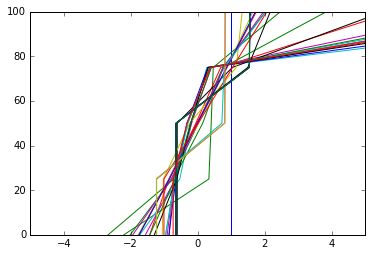

In [73]:
def plot_five_numbers(tX):
    y = [0, 25, 50, 75, 100]
    for i in range(tX.shape[0]):
        plt.plot(tX[i], y)
    plt.axis([-5, 5, 0, 100])
    plt.show()
    
five = five_numbers_summary(stX)
plot_five_numbers(five)
    

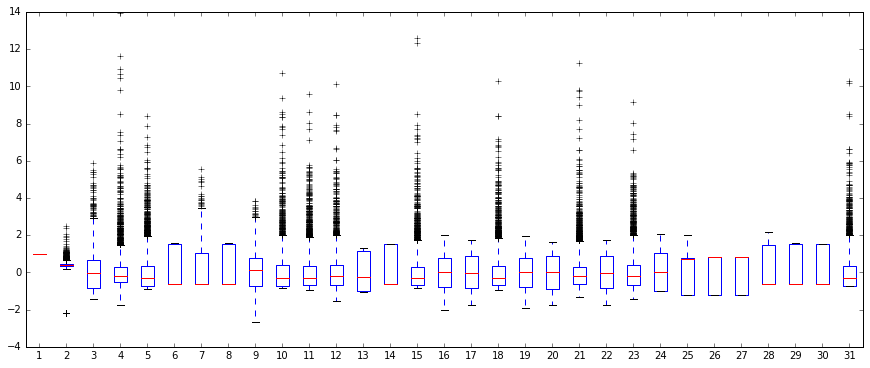

In [108]:
def boxplot_five_number(stX, labels):
    fig = plt.figure(figsize=(15, 6))
    plt.boxplot(stX)
    plt.show
    
lab = list(features_label())
lab = [' ', lab]

boxplot_five_number(stX, lab)